In [1]:
import umap
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn

In [2]:
RUN             = '1'

seeds           = {'1':512, '2':879, '3':9981, '4': 20075, '5': 66, '6': 276, '7': 936664}

root_model_data = '/global/cscratch1/sd/vboehm/Datasets/sdss/by_model/'
root_models     = '/global/cscratch1/sd/vboehm/Models/SDSS_AE/'
root_encoded    = '/global/cscratch1/sd/vboehm/Datasets/encoded/sdss/'
root_decoded    = '/global/cscratch1/sd/vboehm/Datasets/decoded/sdss/'


wlmin, wlmax    = (3388,8318)
fixed_num_bins  = 1000
min_SN          = 50
min_z           = 0.1
max_z           = 0.36
label           = 'galaxies_quasars_bins%d_wl%d-%d'%(fixed_num_bins,wlmin,wlmax)
label_          = label+'_minz%s_maxz%s_minSN%d'%(str(int(min_z*100)).zfill(3),str(int(max_z*100)).zfill(3),min_SN)
label_2         = label_+'_10_fully_connected_mean_div'

In [3]:
train,valid,test,le = pickle.load(open(os.path.join(root_model_data,'combined_%s.pkl'%label_),'rb'))
print('data loaded from file')

data loaded from file


In [4]:
reducer = umap.UMAP(n_neighbors=5,min_dist=0.1,n_components=2)

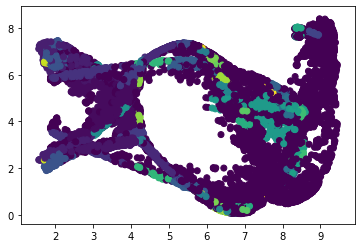

In [5]:
reducer.fit(np.squeeze(train['spec']))

embedding = reducer.transform(np.squeeze(valid['spec']))

import sklearn.cluster as cluster

clustering = cluster.DBSCAN(eps=0.5,min_samples=20)

labels = clustering.fit_predict(embedding)

labels

plt.scatter(embedding[:,0], embedding[:,1], c=labels)

plt.scatter(embedding[:,0], embedding[:,2], c=labels)

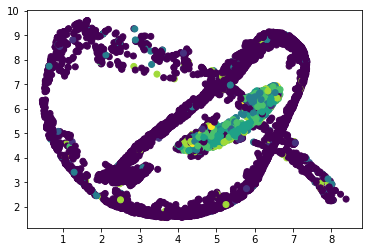

In [6]:
plt.scatter(embedding[:,2], embedding[:,3], c=valid['subclass'])

In [7]:
decoded_train,decoded_valid, decoded_test, mean, std = np.load(os.path.join(root_decoded,'decoded_%s.npy'%(label_2)), allow_pickle=True)

In [26]:
reducer = umap.UMAP(n_neighbors=5,min_dist=0.4,n_components=2)

reducer.fit(np.squeeze(decoded_train))

embedding = reducer.transform(np.squeeze(valid['spec']))



In [27]:
#embedding_train = reducer.transform(np.squeeze(train['spec']))

(array([-1,  0,  1,  2,  3,  4]), array([2085,  864, 3162,  238,  138,  109]))

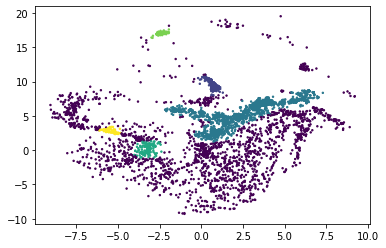

In [28]:
import sklearn.cluster as cluster

clustering = cluster.DBSCAN(eps=0.6,min_samples=100)

labels = clustering.fit_predict(embedding)


plt.scatter(embedding[:,0], embedding[:,1], c=labels, s=2)

np.unique(labels,return_counts=True)

In [ ]:
labels = clustering.fit_predict(embedding_train)


plt.scatter(embedding_train[:,0], embedding_train[:,1], c=labels, s=2)

np.unique(labels,return_counts=True)

In [24]:
from sklearn import metrics
metrics.adjusted_mutual_info_score(labels, valid['subclass'])  

0.14574260103599368

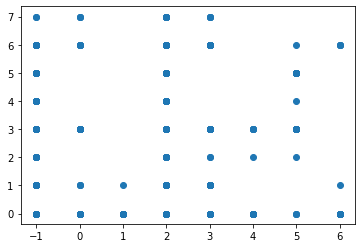

In [19]:
plt.scatter(labels,valid['subclass'])